In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape =', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape =', x_test.shape, ', test label shape=', t_test.shape)

print('\n train label = ', t_train) # 학습 데이터 
print(' test label =', t_test)      # 테스트 데이터

print(x_train[0])


 train shape = (60000, 28, 28) , train label shape =  (60000,)
 test shape = (10000, 28, 28) , test label shape= (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label = [7 2 1 ... 4 5 6]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0 

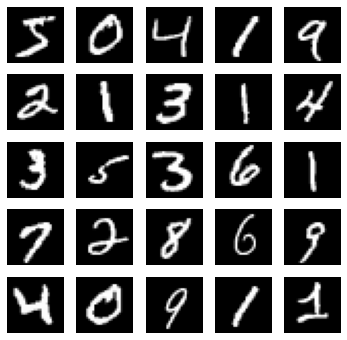

In [7]:
import matplotlib.pyplot as plt

# 25개 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25): # 25개 이미지 출력
    plt.subplot( 5, 5, index + 1)   # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    # plt.title(str(t_train[index]))

plt.show()

In [8]:
# 학습 데이터 / 테스트 데이터 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

print(x_train[0])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

model.evaluate(x_test, t_test)


Epoch 1/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.9103 - val_loss: 0.1972 - val_accuracy: 0.9426
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1479 - accuracy: 0.9561 - val_loss: 0.1369 - val_accuracy: 0.9601
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1031 - accuracy: 0.9704 - val_loss: 0.1233 - val_accuracy: 0.9639
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0793 - accuracy: 0.9762 - val_loss: 0.1094 - val_accuracy: 0.9676
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.1018 - val_accuracy: 0.9707
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.1029 - val_accuracy: 0.9696
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.1097 - val_accuracy:

[0.1377333402633667, 0.9749000072479248]

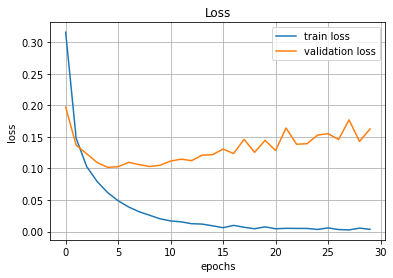

In [11]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

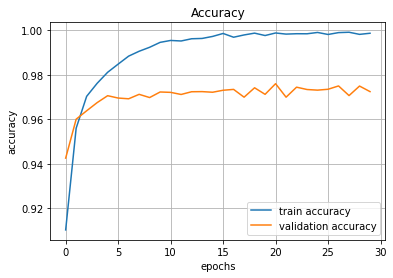

In [12]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()